##Find the best and worst cases for the Gale-Shapley and Irving ( An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.

El código ha sido tomado del siguiente enlace:
https://towardsdatascience.com/gale-shapley-algorithm-simply-explained-caa344e643c2

Sin embargo, se ha realizado las respectivas adaptaciones para presentar lo que requiere el laboratorio.

In [523]:
import random
def create(n,women_list,man_list):
  man_list2 = women_list
  women_list2 = man_list
  dict_2 = {}
  dict_3 = {}
  dict_4 = {}
  dict_5 = {}
  dict_6 = {}
  dict_7 = {}
  c=[]
  count = 0


  for a in women_list:
    arreglo = []
    arr = []
    for i in range(1,n+1):
          arreglo.append(i)
          arr.append(i)
    random.shuffle(arreglo)
    dict_2.setdefault(a,arreglo)
  for a in range(n):
    b=[]
    c.append(b)

  for b in range(n):
    random.shuffle(arreglo)
    for a in range(n):
      c[a].append(arreglo[a])
  for i in range(len(women_list)):
    dict_3.setdefault(women_list[i],c[i])
  for i in dict_2:
    y = []
    for a in range(n):
      t = dict_2.setdefault(i)[a]
      y.append(man_list[t-1])
      dict_4.setdefault(i,y)
  for i in dict_3:
    y = []
    for a in range(n):
      t = dict_3.setdefault(i)[a]
      y.append(women_list[t-1])
    count = count + 1
    dict_5.setdefault(str(count),y)
  count = 0
  for b in dict_2:
      dict_6.setdefault(man_list[count],dict_2.setdefault(b)[::-1])  
      count = count +1
  count = 0
  for b in dict_3:
      dict_7.setdefault(man_list[count],dict_3.setdefault(b)[::-1])  
      count = count +1
  return dict_2,dict_3,dict_4,dict_5,arr,dict_6,dict_7


In [549]:

%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from copy import copy
def clave_ordenacion(tupla):
  return (int(tupla[0]), tupla[1])
def clave_ordenacion2(tupla):
  return (tupla[0], tupla[1])



Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


###n = 4

In [525]:

man_list = ['a', 'b', 'c', 'd']
women_list = ['A', 'B', 'C', 'D']

dictionary = create(4,women_list,man_list)

In [526]:
women_df = pd.DataFrame(dictionary[0])
women_df.index = man_list
man_df = pd.DataFrame(dictionary[1])
man_df.index = man_list

In [527]:
def GaleShapley(man_list,women_list,women_df,man_df):
  women_available = {man:women_list for man in man_list}
  waiting_list = []
  proposals = {}
  count = 0
  # while not all men have pairs
  while len(waiting_list)<len(man_list):
      # man makes proposals
      for man in man_list:
          if man not in waiting_list:
              # each man make proposal to the top women from it's list
              women = women_available[man]
              best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
              proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                  women_df.loc[man][best_choice])
      # if women have more than one proposals 
      # she will choose the best option
      overlays = Counter([key[1] for key in proposals.keys()])
      # cycle to choose the best options
      for women in overlays.keys():
          if overlays[women]>1:
              # pairs to drop from proposals
              pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                      if women in pair}.items(), 
                    key=lambda x: x[1][1]
                    )[1:]
              # if man was rejected by woman
              # there is no pint for him to make proposal 
              # second time to the same woman
              for p_to_drop in pairs_to_drop:
                  del proposals[p_to_drop[0]]
                  _women = copy(women_available[p_to_drop[0][0]])
                  _women.remove(p_to_drop[0][1])
                  women_available[p_to_drop[0][0]] = _women
      # man w*ho successfully created pairs must be added to the waiting list 
      waiting_list = [man[0] for man in proposals.keys()]
      # update counter
      count+=1
  return proposals, count

####Best case with n = 4

In [528]:
women_df2 = pd.DataFrame(dictionary[2])
women_df2.index = dictionary[4]


Below is the list of preference of each of the women

In [491]:
women_df2

,A,B,C,D
1,a,b,c,b
2,d,d,d,c
3,b,a,a,d
4,c,c,b,a


In [492]:
man_df2 = pd.DataFrame(dictionary[3])
man_df2.index = man_list


Below is the list of preference of each of the men


In [493]:
man_df2


,1,2,3,4
a,A,C,B,D
b,D,C,B,A
c,C,B,D,A
d,B,C,D,A


In [529]:
print("man woman")
result = GaleShapley(man_list,women_list,women_df,man_df)
b = []
for a in result[0]:
  b.append(a)
c = sorted(b, key=clave_ordenacion2)
for v in c:
  print(str(v[0]) + "     " + str(v[1]))


man woman
a     A
b     B
c     D
d     C


####Worst case with n = 4

Below is the list of preference of each of the women

In [495]:
women_df2

,A,B,C,D
1,a,b,c,b
2,d,d,d,c
3,b,a,a,d
4,c,c,b,a


Below is the list of preference of each of the women


In [496]:
man_df2

,1,2,3,4
a,A,C,B,D
b,D,C,B,A
c,C,B,D,A
d,B,C,D,A


In [530]:
man_list2 = women_list
women_list2 = man_list
women_df = pd.DataFrame(dictionary[5])
women_df.index = man_list2
man_df = pd.DataFrame(dictionary[6])
man_df.index = man_list2
result = GaleShapley(man_list2,women_list2,women_df,man_df)
b = []
print("woman man")
for a in result[0]:
  b.append(a)
c = sorted(b, key=clave_ordenacion2)
for v in c:
  print(str(v[0]) + "     " + str(v[1]))



woman man
A     c
B     d
C     b
D     a


### n =40

In [531]:

man_list = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39','40']
women_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Ñ', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm']
dictionary = create(40,women_list,man_list)

In [532]:
women_df = pd.DataFrame(dictionary[0])
women_df.index = man_list
man_df = pd.DataFrame(dictionary[1])
man_df.index = man_list

####Best case with n = 40

In [533]:
women_df2 = pd.DataFrame(dictionary[2])
women_df2.index = dictionary[4]


Below is the list of preference of each of the women

In [534]:
women_df2

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,Ñ,O,P,Q,R,S,T,U,V,W,X,Y,Z,a,b,c,d,e,f,g,h,i,j,k,l,m
1,4,1,12,21,6,37,29,3,26,31,39,14,36,32,25,32,14,9,3,23,40,39,1,32,31,14,1,18,28,27,11,24,35,26,5,33,23,12,21,10
2,2,38,18,30,33,4,17,4,37,38,33,3,39,40,28,26,28,24,16,7,30,19,37,12,28,26,16,7,7,36,18,40,3,20,8,28,12,36,31,11
3,40,21,4,33,9,11,26,35,4,13,22,24,40,33,26,28,30,7,29,31,8,34,15,27,9,21,10,16,18,12,7,1,23,37,25,20,2,11,6,24
4,34,15,34,1,29,22,20,29,7,30,36,40,10,38,2,14,27,20,12,36,6,35,13,26,10,35,39,27,17,16,36,25,8,28,27,40,21,3,9,22
5,25,22,30,16,23,3,21,22,11,20,6,19,8,9,40,31,20,21,39,34,29,17,5,21,26,39,17,30,23,9,8,8,38,33,1,23,35,23,22,38
6,22,13,15,25,10,23,30,25,13,36,32,2,32,35,21,4,40,15,35,10,23,2,8,40,1,37,27,22,10,38,3,16,26,21,6,14,5,6,12,33
7,6,2,37,5,40,33,15,16,5,11,30,13,11,8,37,11,13,27,13,37,4,21,28,28,8,9,3,26,33,32,24,27,25,16,22,6,19,8,39,16
8,19,31,32,19,27,8,9,19,33,5,38,35,6,16,18,34,24,26,33,21,20,36,34,29,17,18,5,19,13,28,13,21,5,17,24,29,1,16,36,35
9,23,16,14,37,39,26,13,39,15,39,10,11,25,24,35,24,26,32,27,33,1,6,25,23,36,16,4,4,25,40,40,19,1,14,2,34,17,15,15,17
10,18,20,7,29,2,2,5,21,21,9,12,37,38,22,10,12,31,1,11,40,3,7,36,20,27,13,32,14,30,7,27,12,10,34,29,27,11,25,8,26


In [535]:
man_df2 = pd.DataFrame(dictionary[3])
man_df2.index = man_list


Below is the list of preference of each of the women


In [536]:
man_df2


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
1,U,g,D,e,H,F,E,P,C,a,K,A,J,X,k,L,i,S,m,R,Y,j,Q,M,G,T,b,h,N,W,d,V,I,l,Z,Ñ,O,f,c,B
2,B,l,S,f,Ñ,L,C,T,i,K,M,Q,E,W,c,N,V,U,b,Z,F,R,J,O,d,m,H,I,a,A,P,G,D,h,g,X,k,j,Y,e
3,j,a,Y,B,V,C,b,l,H,L,m,A,K,k,R,G,c,S,P,e,N,Q,i,Ñ,U,d,D,g,T,I,W,h,X,f,E,Z,F,J,O,M
4,k,Y,D,X,c,Ñ,h,A,L,O,m,C,R,K,j,Z,Q,a,N,V,d,U,f,i,B,F,E,e,P,S,l,I,M,g,W,J,b,G,T,H
5,E,V,K,O,i,g,W,L,H,a,Q,d,D,U,C,e,j,N,F,f,I,c,R,T,Ñ,G,Y,Z,k,M,l,S,J,A,X,h,P,b,B,m
6,j,I,c,L,d,e,G,S,N,m,B,W,a,A,Y,Z,H,i,V,k,Q,T,O,C,b,X,f,M,F,h,U,g,R,J,E,l,P,Ñ,D,K
7,A,X,C,Q,g,Y,b,B,O,D,a,l,e,J,H,k,i,U,R,K,G,W,P,M,S,L,m,I,N,c,Z,Ñ,E,d,h,j,F,f,V,T
8,Y,C,R,f,a,I,A,L,k,b,O,X,Ñ,Q,J,Z,h,S,P,g,W,l,F,B,m,K,H,N,c,T,U,d,E,e,M,V,j,D,G,i
9,G,i,E,V,a,D,h,Q,Ñ,B,m,L,N,O,A,M,S,k,d,W,Z,U,I,K,T,X,R,b,c,F,H,Y,l,J,g,j,C,f,e,P
10,L,I,Y,k,X,Q,j,O,e,P,M,T,g,D,V,J,Z,R,a,Ñ,E,f,N,U,F,i,B,A,S,H,l,W,c,b,d,G,C,m,K,h


In [538]:
print("man woman")
result = GaleShapley(man_list,women_list,women_df,man_df)
b = []
for a in result[0]:
  b.append(a)
c = sorted(b, key=clave_ordenacion)
for v in c:
  print(str(v[0]) + "     " + str(v[1]))


man woman
1     m
2     A
3     D
4     X
5     I
6     l
7     J
8     k
9     Ñ
10     j
11     a
12     d
13     C
14     c
15     b
16     T
17     G
18     O
19     L
20     M
21     h
22     g
23     Q
24     N
25     f
26     V
27     Y
28     P
29     H
30     E
31     B
32     e
33     U
34     K
35     S
36     F
37     W
38     R
39     Z
40     i


####Worst case with n = 40

Below is the list of preference of each of the women


In [539]:
women_df2

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,Ñ,O,P,Q,R,S,T,U,V,W,X,Y,Z,a,b,c,d,e,f,g,h,i,j,k,l,m
1,4,1,12,21,6,37,29,3,26,31,39,14,36,32,25,32,14,9,3,23,40,39,1,32,31,14,1,18,28,27,11,24,35,26,5,33,23,12,21,10
2,2,38,18,30,33,4,17,4,37,38,33,3,39,40,28,26,28,24,16,7,30,19,37,12,28,26,16,7,7,36,18,40,3,20,8,28,12,36,31,11
3,40,21,4,33,9,11,26,35,4,13,22,24,40,33,26,28,30,7,29,31,8,34,15,27,9,21,10,16,18,12,7,1,23,37,25,20,2,11,6,24
4,34,15,34,1,29,22,20,29,7,30,36,40,10,38,2,14,27,20,12,36,6,35,13,26,10,35,39,27,17,16,36,25,8,28,27,40,21,3,9,22
5,25,22,30,16,23,3,21,22,11,20,6,19,8,9,40,31,20,21,39,34,29,17,5,21,26,39,17,30,23,9,8,8,38,33,1,23,35,23,22,38
6,22,13,15,25,10,23,30,25,13,36,32,2,32,35,21,4,40,15,35,10,23,2,8,40,1,37,27,22,10,38,3,16,26,21,6,14,5,6,12,33
7,6,2,37,5,40,33,15,16,5,11,30,13,11,8,37,11,13,27,13,37,4,21,28,28,8,9,3,26,33,32,24,27,25,16,22,6,19,8,39,16
8,19,31,32,19,27,8,9,19,33,5,38,35,6,16,18,34,24,26,33,21,20,36,34,29,17,18,5,19,13,28,13,21,5,17,24,29,1,16,36,35
9,23,16,14,37,39,26,13,39,15,39,10,11,25,24,35,24,26,32,27,33,1,6,25,23,36,16,4,4,25,40,40,19,1,14,2,34,17,15,15,17
10,18,20,7,29,2,2,5,21,21,9,12,37,38,22,10,12,31,1,11,40,3,7,36,20,27,13,32,14,30,7,27,12,10,34,29,27,11,25,8,26


Below is the list of preference of each of the men


In [540]:
man_df2

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
1,U,g,D,e,H,F,E,P,C,a,K,A,J,X,k,L,i,S,m,R,Y,j,Q,M,G,T,b,h,N,W,d,V,I,l,Z,Ñ,O,f,c,B
2,B,l,S,f,Ñ,L,C,T,i,K,M,Q,E,W,c,N,V,U,b,Z,F,R,J,O,d,m,H,I,a,A,P,G,D,h,g,X,k,j,Y,e
3,j,a,Y,B,V,C,b,l,H,L,m,A,K,k,R,G,c,S,P,e,N,Q,i,Ñ,U,d,D,g,T,I,W,h,X,f,E,Z,F,J,O,M
4,k,Y,D,X,c,Ñ,h,A,L,O,m,C,R,K,j,Z,Q,a,N,V,d,U,f,i,B,F,E,e,P,S,l,I,M,g,W,J,b,G,T,H
5,E,V,K,O,i,g,W,L,H,a,Q,d,D,U,C,e,j,N,F,f,I,c,R,T,Ñ,G,Y,Z,k,M,l,S,J,A,X,h,P,b,B,m
6,j,I,c,L,d,e,G,S,N,m,B,W,a,A,Y,Z,H,i,V,k,Q,T,O,C,b,X,f,M,F,h,U,g,R,J,E,l,P,Ñ,D,K
7,A,X,C,Q,g,Y,b,B,O,D,a,l,e,J,H,k,i,U,R,K,G,W,P,M,S,L,m,I,N,c,Z,Ñ,E,d,h,j,F,f,V,T
8,Y,C,R,f,a,I,A,L,k,b,O,X,Ñ,Q,J,Z,h,S,P,g,W,l,F,B,m,K,H,N,c,T,U,d,E,e,M,V,j,D,G,i
9,G,i,E,V,a,D,h,Q,Ñ,B,m,L,N,O,A,M,S,k,d,W,Z,U,I,K,T,X,R,b,c,F,H,Y,l,J,g,j,C,f,e,P
10,L,I,Y,k,X,Q,j,O,e,P,M,T,g,D,V,J,Z,R,a,Ñ,E,f,N,U,F,i,B,A,S,H,l,W,c,b,d,G,C,m,K,h


In [541]:
man_list2 = women_list
women_list2 = man_list
women_df = pd.DataFrame(dictionary[5])
women_df.index = man_list2
man_df = pd.DataFrame(dictionary[6])
man_df.index = man_list2
result = GaleShapley(man_list2,women_list2,women_df,man_df)
b = []
print("woman man")
for a in result[0]:
  b.append(a)
c = sorted(b, key=clave_ordenacion2)
for v in c:
  print(str(v[0]) + "     " + str(v[1]))



woman man
A     36
B     27
C     19
D     24
E     6
F     20
G     11
H     22
I     32
J     2
K     5
L     8
M     17
N     26
O     33
P     14
Q     18
R     34
S     35
T     13
U     12
V     16
W     7
X     21
Y     29
Z     30
a     3
b     31
c     28
d     37
e     15
f     38
g     10
h     39
i     9
j     25
k     4
l     1
m     40
Ñ     23


###Irving algorithm

In [583]:

import copy
import random
def getKey(lista, llave):
    for key, val in lista.items():
        if val == llave:
            return key
    return 0

def ciclo(tabla):
    tablaI = tabla[0]
    tablaD = tabla[1]
    if len(tablaI) > len(set(tablaI)):
        return True
    else:
        return False

def noEstable(prefer):
    for i in prefer:
        if len(prefer[i]) == 0:
            return True
    return False

def esEstable(prefer):
  for i in prefer:
    if len(prefer[i]) != 1:
      return False
  return True

def quitarCiclo(prefer, tabla):
  npreferences = prefer
  for i in range(len(tabla[0])-1):
    npreferences[tabla[1][i]].remove(tabla[0][i+1])
    npreferences[tabla[0][i+1]].remove(tabla[1][i])
  return npreferences

def paso1(prefer):
  espera = []
  propuestas={}
  npropuestas={}
  pasos=0
  for i in prefer:
    espera.append(i)
    propuestas[i] = None
    npropuestas[i] = 0
  npreferences = copy.deepcopy(prefer)
  while not len(espera)==0:
    i=espera[0]
    npropuestas[i]+=1
    pasos+=1
    if npropuestas[i]> len(propuestas):
      print("No existe parejas estables.")
      return (False,False)
    for j in prefer[i]:
      if propuestas[j]==None:
        del espera[0]
        propuestas[j]=i
        break
      elif propuestas[j] != i:
        actual = prefer[j].index(i)
        otro = prefer[j].index(propuestas[j])
        if actual < otro:
          del espera[0]
          espera.insert(0, propuestas[j])
          npreferences[propuestas[j]].remove(j)
          npreferences[j].remove(propuestas[j])
          propuestas[j] = i
          break
        else:
          npreferences[i].remove(j)
          npreferences[j].remove(i)
    prefer = copy.deepcopy(npreferences)
  return (propuestas,prefer,pasos)

def paso2(propuestas,prefer,pasos):
  npreferences=copy.deepcopy(prefer)
  for k in prefer:
    indexpropuestas=npreferences[k].index(propuestas[k])
    npreferences[k]= npreferences[k][:indexpropuestas+1]
    #pasos+=1
    for j in prefer:
      key= getKey(propuestas,k)
      if j != k and j != propuestas[k] and j != key:
        try:
          npreferences[j].remove(k)
        except ValueError:
          pass
  return (npreferences,pasos)


def paso3(prefer,pasos):
  si=True
  while True:
    tabla=([],[])
    if noEstable(prefer):
      print("No existe parejas estables.")
      return False
    for i in prefer:
      if len(prefer[i]) >= 2 and si == True:
        match1 = i
        tabla[0].append(match1)
        match2 = prefer[i][1]
        tabla[1].append(match2)
        si=False
        pasos+=1
      elif si==False:
        if (ciclo(tabla)):
          prefer=quitarCiclo(prefer,tabla)
          si = True
          pasos+=1
          break
        match1 = prefer[match2][-1]
        tabla[0].append(match1)
        match2 = prefer[match1][1]
        tabla[1].append(match2)
        pasos+=1
    if esEstable(prefer):
      return (prefer,pasos)

  return False
def irving(prefer):
  a=paso1(prefer)
  propuestas=a[0]
  if propuestas==False:
    return False
  prefer1=a[1]
  pasos=a[2]
  prefer2=paso2(propuestas,prefer1,pasos)[0]
  pasos=paso2(propuestas,prefer1,pasos)[1]
  if prefer2==False:
    return False
  prefer3=paso3(prefer2,pasos)
  matches=prefer3[0]
  pasos=prefer3[1]
  for i in matches:
    a=i
    for j in matches[i]:
      print(a," - ", j)

### n = **4**

####Best Case

In [584]:
def best(n):
  prefer={}
  for k in range(n):
      list=[]
      list.append(n-k-1)
      while not len(list)==n-1:
        r=random.randint(0,n-1)
        if r not in list and r!=k:
          list.append(r)
      prefer[k]=list
  return prefer
irving(best(4))

0  -  3
1  -  2
2  -  1
3  -  0


#### Worst Case

In [585]:
def worst(n):
  prefer={}
  for k in range(n):
      ni=n
      list=[]
      for i in range(k+1,n):
        list.append(i)
      for j in range (k):
        list.append(j)
      prefer[k]=list
  return prefer
irving(worst(4))

0  -  3
1  -  2
2  -  1
3  -  0


###n = 40

####Best Case

In [586]:
irving(worst(40))

0  -  39
1  -  2
2  -  1
3  -  4
4  -  3
5  -  6
6  -  5
7  -  8
8  -  7
9  -  10
10  -  9
11  -  12
12  -  11
13  -  14
14  -  13
15  -  16
16  -  15
17  -  18
18  -  17
19  -  20
20  -  19
21  -  22
22  -  21
23  -  24
24  -  23
25  -  26
26  -  25
27  -  28
28  -  27
29  -  30
30  -  29
31  -  32
32  -  31
33  -  34
34  -  33
35  -  36
36  -  35
37  -  38
38  -  37
39  -  0


####Worst Case

In [587]:
irving(best(40))

0  -  39
1  -  38
2  -  37
3  -  36
4  -  35
5  -  34
6  -  33
7  -  32
8  -  31
9  -  30
10  -  29
11  -  28
12  -  27
13  -  26
14  -  25
15  -  24
16  -  23
17  -  22
18  -  21
19  -  20
20  -  19
21  -  18
22  -  17
23  -  16
24  -  15
25  -  14
26  -  13
27  -  12
28  -  11
29  -  10
30  -  9
31  -  8
32  -  7
33  -  6
34  -  5
35  -  4
36  -  3
37  -  2
38  -  1
39  -  0


###Random Preference List

##Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.


###n = 4

In [575]:
man_list = ['a', 'b', 'c', 'd']
women_list = ['A', 'B', 'C', 'D']
total = []
for i in range(100):
  result = []
  dictionary = create(4,women_list,man_list)
  women_df = pd.DataFrame(dictionary[0])
  women_df.index = man_list
  man_df = pd.DataFrame(dictionary[1])
  man_df.index = man_list
  result = GaleShapley(man_list,women_list,women_df,man_df)
  total.append(result[1])
promedio2 = sum(total) / float(len(total))
print("Promedio:  " + str(promedio2))
print("Mínimo:  " + str(min(total)))
print("Máximo:  " + str(max(total)))


Promedio:  2.93
Mínimo:  1
Máximo:  7


###n = 40

In [574]:

man_list = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39','40']
women_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Ñ', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm']
total2 = []
for i in range(100):
  dictionary = create(40,women_list,man_list)
  women_df = pd.DataFrame(dictionary[0])
  women_df.index = man_list
  man_df = pd.DataFrame(dictionary[1])
  man_df.index = man_list
  total2.append(result[1])
promedio = sum(total2) / float(len(total2))
print("Promedio:  " + str(promedio))
print("Mínimo:  " + str(min(total2)))
print("Máximo:  " + str(max(total2)))


Promedio:  4.0
Mínimo:  4
Máximo:  4


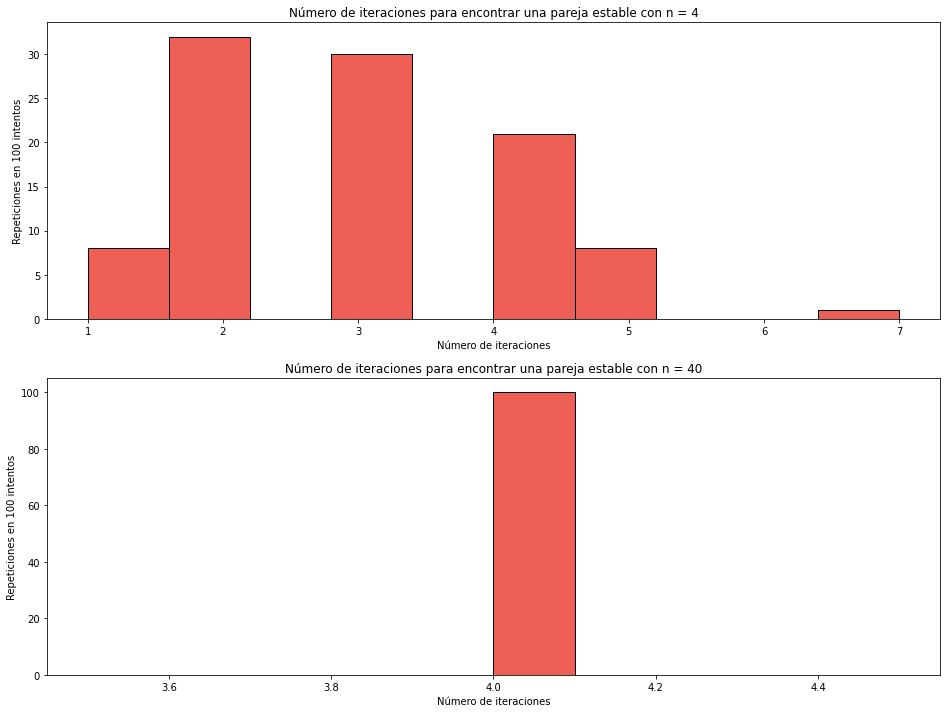

In [576]:

 
fig, axs = plt.subplots(2, 1, figsize=(16, 12))
axs[0].set(title = "Número de iteraciones para encontrar una pareja estable con n = 4")
axs[0].hist(total, edgecolor = 'black',color='#EE6055',  linewidth=1)
axs[0].set(xlabel = "Número de iteraciones")
axs[0].set(ylabel = "Repeticiones en 100 intentos")
 
axs[1].set(title = "Número de iteraciones para encontrar una pareja estable con n = 40")
axs[1].hist(total2, edgecolor = 'black',color='#EE6055',  linewidth=1)
axs[1].set(xlabel = "Número de iteraciones")
axs[1].set(ylabel = "Repeticiones en 100 intentos")
 
plt.show()